In [1]:
import pandas as pd
from pathlib import Path
from unidecode import unidecode
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# def export_to_parquet(folder_name, output_filename="combined_data.parquet"):
#     """
#     Read all Excel files in the given folder (including all sheets),
#     normalize column names, concatenate into a single DataFrame,
#     and write the result to a Parquet file.

#     Args:
#         folder_name (str): Path to folder containing .xlsx files.
#         output_filename (str): Output Parquet filename.
#     """
#     data_dir = Path(folder_name)
#     all_dfs = []

#     # 1. Collect all data from each Excel file and each sheet
#     for file_path in data_dir.glob("*.xlsx"):
#         print(f"Reading: {file_path.name}")
#         # Read all sheets into a dict: {sheet_name: DataFrame}
#         excel_data = pd.read_excel(file_path, sheet_name=None)
        
#         for sheet_name, df in excel_data.items():
#             # Add metadata columns to keep track of origin
#             df['origin_file'] = file_path.name
#             df['origin_sheet'] = str(sheet_name)
            
#             # Ensure all column names are strings (Parquet requires string column names)
#             df.columns = df.columns.astype(str)
            
#             all_dfs.append(df)

#     if not all_dfs:
#         print("No data found to export.")
#         return

#     # 2. Concatenate all DataFrames into a single DataFrame
#     final_df = pd.concat(all_dfs, ignore_index=True)

#     # Normalize column names: remove accents, make lowercase, replace spaces with underscores
#     final_df.columns = [unidecode(col).lower().replace(' ', '_') for col in final_df.columns]

#     final_df = final_df[final_df['sobaodanh'].notna()]
#     final_df['sobaodanh'] = final_df['sobaodanh'].astype(int).astype(str).str.zfill(8)

#     # Select and reorder the columns we care about. If some columns are missing, this will raise a KeyError.
#     # (Keep this explicit selection to preserve a consistent schema across inputs.)
#     final_df = final_df[['sobaodanh', 'toan', 'van', 'li', 'hoa', 'sinh', 'tin_hoc',
#        'cong_nghe_cong_nghiep', 'cong_nghe_nong_nghiep', 'su', 'dia',
#        'giao_duc_kinh_te_va_phap_luat', 'ngoai_ngu', 'giao_duc_cong_dan',
#        'ma_mon_ngoai_ngu', 'origin_file', 'origin_sheet']]
    
#     # String columns
#     string_cols = [
#         'sobaodanh',
#         'ma_mon_ngoai_ngu',
#         'origin_file',
#         'origin_sheet'
#     ]

#     for col in string_cols:
#         if col in final_df.columns:
#             final_df[col] = final_df[col].astype('string')

#     # Score columns → float32 (memory efficient)
#     score_cols = [
#         'toan', 'van', 'li', 'hoa', 'sinh', 'tin_hoc',
#         'cong_nghe_cong_nghiep', 'cong_nghe_nong_nghiep',
#         'su', 'dia', 'giao_duc_kinh_te_va_phap_luat',
#         'ngoai_ngu', 'giao_duc_cong_dan'
#     ]

#     for col in score_cols:
#         if col in final_df.columns:
#             final_df[col] = pd.to_numeric(final_df[col], errors='coerce').astype('float32')

#     final_df = final_df.sort_values('sobaodanh').reset_index(drop=True)
    
#     # 3. Export to Parquet using pyarrow (fast and supports complex types)
#     final_df.to_parquet(output_filename, engine='pyarrow', index=False)
    
#     print("-" * 30)
#     print(f"Success: data exported to {output_filename}")
#     print(f"Total rows: {len(final_df)}")
#     print(f"Total columns: {len(final_df.columns)}")

# # Execute the export on the 'raw_data' folder
# export_to_parquet("raw_data")

In [ ]:
# Read the combined Parquet file and display the first few rows
df = pd.read_parquet('combined_data.parquet')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153226 entries, 0 to 1153225
Data columns (total 17 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   sobaodanh                      1153226 non-null  string 
 1   toan                           1137417 non-null  float32
 2   van                            1144098 non-null  float32
 3   li                             351733 non-null   float32
 4   hoa                            244283 non-null   float32
 5   sinh                           71616 non-null    float32
 6   tin_hoc                        7602 non-null     float32
 7   cong_nghe_cong_nghiep          2290 non-null     float32
 8   cong_nghe_nong_nghiep          22048 non-null    float32
 9   su                             495165 non-null   float32
 10  dia                            489581 non-null   float32
 11  giao_duc_kinh_te_va_phap_luat  246401 non-null   float32
 12  ngoai_ngu     

In [ ]:
# ==============================
# Global Style
# ==============================
sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# Assume df is already loaded in a previous cell
# df = pd.read_parquet("combined_data.parquet")

bins = np.arange(0, 10.5, 0.5)

# Human-readable Vietnamese display names for each subject column
SUBJECT_LABELS = {
    "toan":                        "Toán",
    "van":                         "Ngữ văn",
    "li":                          "Vật lí",
    "hoa":                         "Hóa học",
    "sinh":                        "Sinh học",
    "tin_hoc":                     "Tin học",
    "cong_nghe_cong_nghiep":       "Công nghệ Công nghiệp",
    "cong_nghe_nong_nghiep":       "Công nghệ Nông nghiệp",
    "su":                          "Lịch sử",
    "dia":                         "Địa lí",
    "giao_duc_kinh_te_va_phap_luat": "Giáo dục Kinh tế và Pháp luật",
    "ngoai_ngu":                   "Ngoại ngữ",
    "giao_duc_cong_dan":           "Giáo dục Công dân",
}

# Vietnamese labels for each foreign-language code
FOREIGN_LANG_LABELS = {
    "N1": "Tiếng Anh",
    "N2": "Tiếng Nga",
    "N3": "Tiếng Pháp",
    "N4": "Tiếng Trung",
    "N5": "Tiếng Đức",
    "N6": "Tiếng Nhật",
    "N7": "Tiếng Hàn",
}

def plot_and_save(data, title, filename):
    """Plot a histogram of score data, annotate it with summary stats, and save to disk."""
    n = len(data)
    mean = data.mean()
    median = data.median()
    std = data.std()
    count_10 = (data == 10).sum()
    count_0 = (data == 0).sum()

    # Create figure and axes explicitly
    fig, ax = plt.subplots(figsize=(9, 6))

    sns.histplot(
        data,
        bins=bins,
        binrange=(0, 10),
        kde=False,
        ax=ax
    )

    ax.set_title(title, fontsize=14, fontweight="bold")
    ax.set_xlabel("Điểm số")
    ax.set_ylabel("Số lượng thí sinh")
    ax.set_xlim(0, 10)
    ax.set_xticks(bins)

    # Summary statistics box — labels kept in Vietnamese for the rendered chart
    summary_text = (
        f"Số thí sinh: {n:,}\n"
        f"ĐTB: {mean:.2f}\n"
        f"Trung vị: {median:.2f}\n"
        f"Độ lệch chuẩn: {std:.2f}\n"
        f"Số điểm 10: {count_10:,}\n"
        f"Số điểm 0: {count_0:,}"
    )

    # Place the text box inside the chart area; adjust coordinates if needed
    plt.gcf().text(
        0.15, 0.7,
        summary_text,
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray')
    )

    plt.tight_layout()

    # KEY: save before show to capture the full layout including the text box
    plt.savefig(filename, dpi=120, bbox_inches='tight')

    # Comment out plt.show() when processing many charts to avoid blocking
    # plt.show()

    plt.close(fig)  # Release memory after saving

# ==============================
# Loop over all numeric score columns (except ngoai_ngu, handled separately)
# ==============================
output_dir = "charts"
os.makedirs(output_dir, exist_ok=True)

score_columns = df.select_dtypes(include=["float32", "float64"]).columns
score_columns = score_columns.drop("ngoai_ngu", errors="ignore")

for col in score_columns:
    data = df[col].dropna()
    if not data.empty:
        file_path = os.path.join(output_dir, f"{col}.png")
        # Use the Vietnamese display name for the chart title if available
        label = SUBJECT_LABELS.get(col, col)
        plot_and_save(data, f"Phân bố điểm - {label}", file_path)
        print(f"--- Saved: {col}.png")

# ==============================
# Handle Foreign Language subject (split by language code N1–N7)
# ==============================
if "ngoai_ngu" in df.columns and "ma_mon_ngoai_ngu" in df.columns:
    print("\n--- Exporting foreign language score charts (N1–N7) ---")

    # Keep only rows where both the score and language code are present
    langs = df[["ngoai_ngu", "ma_mon_ngoai_ngu"]].dropna(subset=["ngoai_ngu", "ma_mon_ngoai_ngu"])

    # Iterate over each language code (N1, N2, ..., N7)
    for code, group in langs.groupby("ma_mon_ngoai_ngu"):

        # Build the output file path (e.g., ngoai_ngu_N1.png)
        filename = f"ngoai_ngu_{code}.png"
        file_path = os.path.join(output_dir, filename)

        # Use the Vietnamese language name for the chart title
        lang_name = FOREIGN_LANG_LABELS.get(code, code)
        chart_title = f"Phân bố điểm Ngoại ngữ - {lang_name} ({code})"

        plot_and_save(group["ngoai_ngu"], chart_title, file_path)
        print(f"   [OK] Saved: {filename}")

print(f"\nDone! All charts saved to folder: '{output_dir}'")

--- Saved: toan.png
--- Saved: van.png
--- Saved: li.png
--- Saved: hoa.png
--- Saved: sinh.png
--- Saved: tin_hoc.png
--- Saved: cong_nghe_cong_nghiep.png
--- Saved: cong_nghe_nong_nghiep.png
--- Saved: su.png
--- Saved: dia.png
--- Saved: giao_duc_kinh_te_va_phap_luat.png
--- Saved: giao_duc_cong_dan.png

--- Exporting foreign language score charts (N1–N7) ---
   [OK] Saved: ngoai_ngu_N1.png
   [OK] Saved: ngoai_ngu_N2.png
   [OK] Saved: ngoai_ngu_N3.png
   [OK] Saved: ngoai_ngu_N4.png
   [OK] Saved: ngoai_ngu_N5.png
   [OK] Saved: ngoai_ngu_N6.png
   [OK] Saved: ngoai_ngu_N7.png

Done! All charts saved to folder: 'charts'


In [4]:
df = pd.read_parquet('combined_data.parquet')

df['ma_tinh'] = df['sobaodanh'].str[:2]
print(df.head())


df.to_parquet('combined_data.parquet', engine='pyarrow', index=False)

  sobaodanh  toan   van    li   hoa  sinh  tin_hoc  cong_nghe_cong_nghiep  \
0  01000001  5.75  7.75   NaN  7.75  8.25      NaN                    NaN   
1  01000002  8.00  8.25  8.50  6.75   NaN      NaN                    NaN   
2  01000003  6.75  8.50  8.75   NaN   NaN      NaN                    NaN   
3  01000004  5.25  7.50  6.50  5.50   NaN      NaN                    NaN   
4  01000005   NaN  7.00   NaN   NaN   NaN      NaN                    NaN   

   cong_nghe_nong_nghiep   su   dia  giao_duc_kinh_te_va_phap_luat  ngoai_ngu  \
0                    NaN  NaN   NaN                            NaN        NaN   
1                    NaN  NaN   NaN                            NaN        NaN   
2                    NaN  NaN   NaN                            NaN        NaN   
3                    NaN  NaN   NaN                            NaN        NaN   
4                    NaN  5.5  6.25                            NaN        NaN   

   giao_duc_cong_dan ma_mon_ngoai_ngu  \
0        

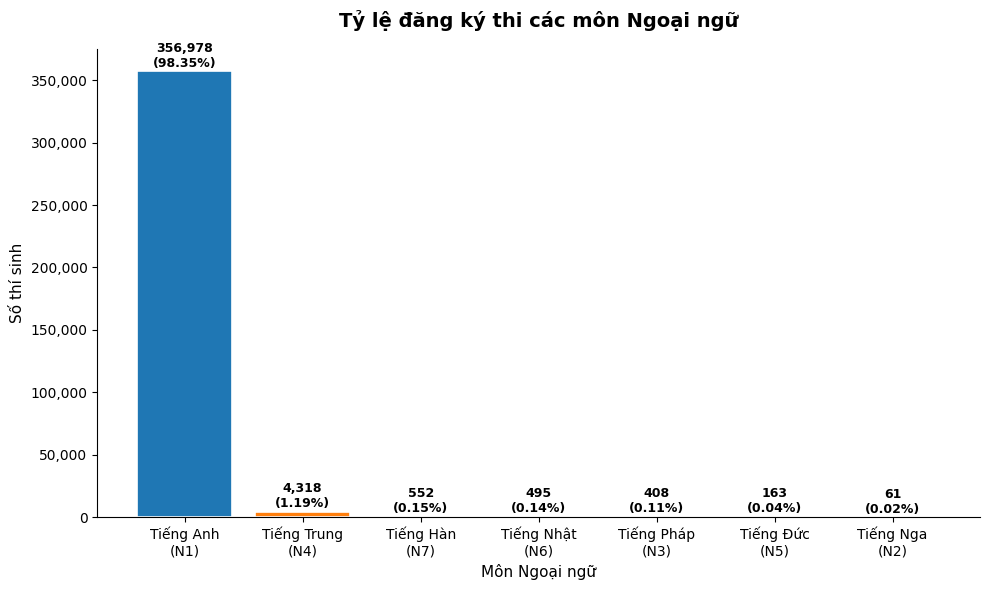

Saved: charts/ngoai_ngu_bar.png


In [3]:

# ==============================
# Bar chart – Tỷ lệ đăng ký các môn Ngoại ngữ
# ==============================
df = pd.read_parquet('combined_data.parquet')

lang_counts = (
    df[df['ma_mon_ngoai_ngu'].notna() & df['ngoai_ngu'].notna()]
    ['ma_mon_ngoai_ngu']
    .value_counts()
    .sort_values(ascending=False)
)

FOREIGN_LANG_LABELS = {
    "N1": "Tiếng Anh",
    "N2": "Tiếng Nga",
    "N3": "Tiếng Pháp",
    "N4": "Tiếng Trung",
    "N5": "Tiếng Đức",
    "N6": "Tiếng Nhật",
    "N7": "Tiếng Hàn",
}

total = lang_counts.sum()
x_labels = [f"{FOREIGN_LANG_LABELS.get(c, c)}\n({c})" for c in lang_counts.index]
counts    = lang_counts.values
colors    = plt.cm.tab10.colors[:len(counts)]

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(x_labels, counts, color=colors, edgecolor='white', linewidth=1.2)

# Annotate each bar with count + percentage
for bar, count in zip(bars, counts):
    pct = count / total * 100
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + total * 0.003,
        f"{count:,}\n({pct:.2f}%)",
        ha='center', va='bottom', fontsize=9, fontweight='bold'
    )

ax.set_title("Tỷ lệ đăng ký thi các môn Ngoại ngữ", fontsize=14, fontweight="bold", pad=16)
ax.set_xlabel("Môn Ngoại ngữ", fontsize=11)
ax.set_ylabel("Số thí sinh", fontsize=11)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
sns.despine()

plt.tight_layout()
plt.savefig("charts/ngoai_ngu_bar.png", dpi=120, bbox_inches='tight')
plt.show()
print("Saved: charts/ngoai_ngu_bar.png")
